# Multiagent Pattern - Multiagent Collaboration

<img src="../img/multiagent_pattern.png" alt="Alt text" width="500"/>

---

You may have heard about frameworks like [CrewAI](https://www.crewai.com/) or [AutoGen](https://microsoft.github.io/autogen/0.2/), which allow you to create multi-agent applications.

These frameworks implement different variations of the multi-agent pattern, in which tasks are divided into **smaller subtasks executed by different roles** (e.g. one agent can be a software engineer, another a project manager, etc.)

For this final lesson, I wanted to build something more elaborate. That's why I've been working on a 𝐦𝐢𝐧𝐢𝐦𝐚𝐥𝐢𝐬𝐭 𝐯𝐞𝐫𝐬𝐢𝐨𝐧 𝐨𝐟 𝐂𝐫𝐞𝐰𝐀𝐈, drawing inspiration from two of its key concepts: 𝐂𝐫𝐞𝐰 and 𝐀𝐠𝐞𝐧𝐭.

Additionally, I've also borrowed ideas from [𝐀𝐢𝐫𝐟𝐥𝐨𝐰](https://airflow.apache.org/)'𝐬 𝐝𝐞𝐬𝐢𝐠𝐧 𝐩𝐡𝐢𝐥𝐨𝐬𝐨𝐩𝐡𝐲, using >> and << to define dependencies between my agents. In this micro-CrewAI, 𝐚𝐠𝐞𝐧𝐭𝐬 are equivalent to 𝐀𝐢𝐫𝐟𝐥𝐨𝐰 𝐓𝐚𝐬𝐤𝐬 and the 𝐂𝐫𝐞𝐰 is equivalent to an 𝐀𝐢𝐫𝐟𝐥𝐨𝐰 𝐃𝐀𝐆.

Take a look at the previous lessons if you haven't!

* [First Lesson: The Reflection Pattern](https://github.com/neural-maze/agentic_patterns/blob/main/notebooks/reflection_pattern.ipynb)
* [Second Lesson: The Tool Pattern](https://github.com/neural-maze/agentic_patterns/blob/main/notebooks/tool_pattern.ipynb)
* [Third Lesson: The Planning Pattern](https://github.com/neural-maze/agentic_patterns/blob/main/notebooks/planning_pattern.ipynb)

**Let's begin!!** 💪

## The Agent Class

First of all, we need an **Agent Class**. This class implements an
Agent, and internally it implements the ReAct technique (check [Lesson 3](https://github.com/neural-maze/agentic_patterns/blob/main/notebooks/planning_pattern.ipynb) if you want to see this technique in detail!).

In [1]:
from agentic_patterns.multiagent_pattern.agent import Agent

Let's create some example agent, to see how it works.

In [2]:
agent_example = Agent(
    name="Poet Agent",
    backstory="You are a well-known poet, who enjoys creating high quality poetry.",
    task_description="Write a poem about the meaning of life",
    task_expected_output="Just output the poem, without any title or introductory sentences",
)

In [3]:
print(agent_example.run())

In realms of existence, we wander and roam 
searching for answers to an eternal home 
a place where hearts can find their peaceful nest 
where love and laughter are the ultimate quest 

In moments of joy, we grasp and we hold 
the beauty of life, like a story unfold 
in sorrow's darkness, we seek to find 
a glimmer of hope, a light left behind 

Perhaps the meaning of life is not one thing 
but a tapestry woven with every heartbeat's ring 
a kaleidoscope of moments, shining bright 
a dance between darkness and the light 

Maybe it's found in the love we give and share 
in the connection of hearts, beyond compare 
or perhaps in the solo journey of the soul 
where the whispers of the heart make us whole 

In the grand symphony of existence and time 
each note unique, yet together intertwined 
the meaning of life, a mystery divine 
unfolding like a rose, in every moment's design


You can also associate tools with the agent. Let's create a tool for writing some string into a CSV.

In [4]:
from agentic_patterns.tool_pattern.tool import tool

In [5]:
@tool
def write_str_to_txt(string_data: str, txt_filename: str):
    """
    Writes a string to a txt file.

    This function takes a string and writes it to a text file. If the file already exists, 
    it will be overwritten with the new data.

    Args:
        string_data (str): The string containing the data to be written to the file.
        txt_filename (str): The name of the text file to which the data should be written.
    """
    # Write the string data to the text file
    with open(txt_filename, mode='w', encoding='utf-8') as file:
        file.write(string_data)

    print(f"Data successfully written to {txt_filename}")

In [6]:
agent_tool_example = Agent(
    name="Writer Agent",
    backstory="You are a language model specialised in writing text into .txt files",
    task_description="Write the string 'This is a Tool Agent' into './tool_agent_example.txt'",
    task_expected_output="A .txt file containing the given string",
    tools=write_str_to_txt,
)

In [7]:
agent_tool_example.run()


Thought: I need to take the given string and write it to a .txt file with a specified name

Using Tool: write_str_to_txt

Tool call dict: 
{'name': 'write_str_to_txt', 'arguments': {'string_data': 'This is a Tool Agent', 'txt_filename': './tool_agent_example.txt'}, 'id': 0}
Data successfully written to ./tool_agent_example.txt

Tool result: 
None

Observations: {0: None}


'A .txt file containing the given string'

## Defining Agent Dependencies

Let's define two agents now.

In [8]:
agent_1 = Agent(
    name="Poet Agent",
    backstory="You are a well-known poet, who enjoys creating high quality poetry.",
    task_description="Write a poem about the meaning of life",
    task_expected_output="Just output the poem, without any title or introductory sentences",
)

agent_2 = Agent(
    name="Poem Translator Agent",
    backstory="You are an expert translator especially skilled in Ancient Greek",
    task_description="Translate a poem into Ancient Greek", 
    task_expected_output="Just output the translated poem and nothing else"
)

We can define the agent dependencies using the `>>` operator.

In [9]:
agent_1 >> agent_2

Poem Translator Agent

This means `agent_2` depends on `agent_1`. We can check the dependencies and dependents of both agents.

In [11]:
print("Agent 1 dependencies: ", agent_1.dependencies)
print("Agent 1 dependents: ", agent_1.dependents)
print("Agent 2 dependencies: ", agent_2.dependencies)
print("Agent 2 dependents: ", agent_2.dependents)

Agent 1 dependencies:  []
Agent 1 dependents:  [Poem Translator Agent]
Agent 2 dependencies:  [Poet Agent]
Agent 2 dependents:  []


Now, if we run `agent_1`, the results will be added to `agent_2`'s context.

In [12]:
print(agent_1.run())

In whispered winds that gently sway,
A mystery unfolds each passing day,
A question mark that echoes through our years,
What meaning lies behind our laughter, joy and tears?

Is it the bloom of love that takes our breath?
Or summer sunshine that brings warmth to our death?
Perhaps it's the quiet peaceful nights that come,
And the stillness that illuminates, like the morning's gentle hum.

Is life a fleeting dream that we all chase?
A pursuit of dreams, with moments we can't replace?
Or is it the collective tapestry we weave?
Where each thread's meaning intersects, the hearts we give and retrieve.

In nature's depths, in art and love we find our truth,
In connection with each soul, the beat of our youth,
And as our seasons unfold, we begin to realize,
Life's meaning lies not in its length, but in the moment's gentle sigh.

Yet meaning's never-ending quest that beats within our heart,
Leads us to weave a patchwork of love, our lives' unwinding art,
In searching for the puzzle's end, we f

In [13]:
print(agent_2.context)

Poem Translator Agent received context: 
In whispered winds that gently sway,
A mystery unfolds each passing day,
A question mark that echoes through our years,
What meaning lies behind our laughter, joy and tears?

Is it the bloom of love that takes our breath?
Or summer sunshine that brings warmth to our death?
Perhaps it's the quiet peaceful nights that come,
And the stillness that illuminates, like the morning's gentle hum.

Is life a fleeting dream that we all chase?
A pursuit of dreams, with moments we can't replace?
Or is it the collective tapestry we weave?
Where each thread's meaning intersects, the hearts we give and retrieve.

In nature's depths, in art and love we find our truth,
In connection with each soul, the beat of our youth,
And as our seasons unfold, we begin to realize,
Life's meaning lies not in its length, but in the moment's gentle sigh.

Yet meaning's never-ending quest that beats within our heart,
Leads us to weave a patchwork of love, our lives' unwinding art

Now, if we run the second agent, it will use the context received from the previous agent to generate its output.

In [14]:
print(agent_2.run())

Ἀ.eduκτὰ συγνώμη τὰ σόγονα που ψιθύρουν καὶ που εἶναι εἰρήνεια,

Μυστήριο ἀνοίγει διαρκῶς καλούμενοι,
Ἐρώτημα ἕνα που ἐλέγξει τὰ ἡλικώματα μας,
Τί σημαίνουν πίσω ἀπὸ τὰ γέλια μας, χαρά καὶ δάκρυα;

Ἢ εἶναι ἡ ἄνθηση τῆς ἀγάπης που παίρνει τὸ ἄφθονο màς;
Ἢ ἡ θέρος ἡλιοφάνεια που βραβεύει θερμότητα στο θάνατο μας;
Ἢ ἴσως εἶναι τὰ ἡσύχια παλαίωναν που ἔρχεται,
Και ἡ ἠρεμία που φωτίζει, ὅπως τὸ πρωΐνὸν ὕφος;

Ἢ εἶναι ἡ ζωὴ εἴδωλο που ὅλοι κυνηγοῦμε;
Ἐξόφλησις ὀνείρων, με τὰ κρυστάλλινα κῶλα που δέν τον καθαρισμό;
Ἢ εἶναι ἡ συλλεκτική tapisserie που ὑφαίνουμε;
Ὁπου ἡ κάθε νήμα εἶναι ἡ σημασία που διασταυρώνεται, τznamὴ καρδιές που δίναμε καὶ παίρνουμε.

Στὴ φύση βρύν, στὴ τέχνη καὶ τῆ ἀγάπη που εὑρίσκουμε τὴν ἀλήθεια μας,
Στὴ σύνδεση με τὴν ψυχή, ἡ κρούση τῶν νιάτων;
Και ὅσο ξετυλίγονται οἱ καιροί μας, ἀρχίζουμε νὰ συνοραῖστε,
Ἡ σημασία τῆς ζωῆς βρὶσκεται ὄχι στο μῆκος ἀλλά τὴ δYG ὑπὲρ τῆσ momentos εἰδικώ.

Ἀλλὰ ἡ ἀναζήτηση τῆς σημασίας ποὺ παίρνει ἡ κρύπτη στὴ καρδιά μας,
Μᾶς ὁδηγεῖ νὰ ὑφάν

## The Crew

In [15]:
from agentic_patterns.multiagent_pattern.crew import Crew

In [28]:
with Crew() as crew:
    agent_1 = Agent(
        name="Poet Agent",
        backstory="You are a well-known poet, who enjoys creating high quality poetry.",
        task_description="Write a poem about the meaning of life",
        task_expected_output="Just output the poem, without any title or introductory sentences",
    )

    agent_2 = Agent(
        name="Poem Translator Agent",
        backstory="You are an expert translator especially skilled in Spanish",
        task_description="Translate a poem into Spanish", 
        task_expected_output="Just output the translated poem and nothing else"
    )

    agent_3 = Agent(
        name="Writer Agent",
        backstory="You are an expert transcriber, that loves writing poems into txt files",
        task_description="You'll receive a Spanish poem in your context. You need to write the poem into './poem.txt' file",
        task_expected_output="A txt file containing the greek poem received from the context",
        tools=write_str_to_txt,
    )

    agent_1 >> agent_2 >> agent_3

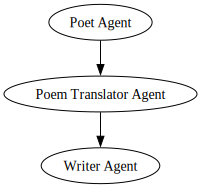

In [29]:
crew.plot()

In [30]:
crew.run()


RUNNING AGENT: Poet Agent

In the grand tapestry of time and space,
A thread of existence weaves its place,
A fleeting moment, a spark of might,
A life that burns, and flickers in the night.

We dance upon the earth, with feet of clay,
 Searching for answers, night and day,
We toil and struggle, we laugh and play,
Yet in the end, what does it all convey?

Some say it's purpose, some say it's fate,
Some claim to know, while others hesitate,
But as we journey through life's twisted gate,
We begin to see, our own path create.

Perhaps the meaning lies, not in the end,
But in the journey, the love, the friend,
The sun-kissed days, the starry nights,
The memories we hold, the laughter, the fights.

Or maybe it's a mystery we'll never know,
A truth that's hidden, in the cosmos' glow,
A secret that only the universe can share,
A riddle that's solved, only in the silence we spare.

But this we do know, in this life we lead,
We have the power, to plant the seed,
To nurture growth, to tend the 